# **AF**: Inteligência Artificial
Facens - Sorocaba
Prof. Adson Nogueira Alves


 **NOME**: MATHEUS DIAS CLAUSS

 **RA**: 150007
 
 **EMAIL**: matheus.dclauss@gmail.com

# **Previsão de Tempo de Entrega em Sistemas de Delivery com Técnicas de Regressão**

Este projeto tem como objetivo prever o tempo de entrega de pedidos em sistemas de delivery com base em variáveis como distância, condições climáticas, localização do restaurante, entre outras. Para isso, utilizaremos técnicas de regressão supervisionada aplicadas a um conjunto de dados disponibilizado no Kaggle.



Segue overview da database:
1- Order_ID: Identificador único do pedido.

2- Distance_km: Distância (em quilômetros) entre o ponto de origem e o destino.

3- Weather: Condições meteorológicas durante o trajeto (ex: "Windy", "Clear", "Foggy", "Rainy").

4- Traffic_Level: Nível de tráfego no caminho (ex: "Low", "Medium").

5- Time_of_Day: Período do dia em que o pedido foi feito (ex: "Afternoon", "Evening", "Night", "Morning").

6- Vehicle_Type: Tipo de veículo utilizado para a entrega (ex: "Scooter", "Bike").

7- Preparation_Time_min: Tempo de preparação do pedido, em minutos.

8- Courier_Experience_yrs: Experiência do entregador em anos.

9- Delivery_Time_min: Tempo total de entrega, em minutos (variável dependente).



Database Link: https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction?resource=download

In [ ]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Carregamento Dados
df = pd.read_csv("Food_Delivery_Times.csv")

   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


In [39]:
#Overview de dados
print("Formato do dataset:", df.shape)

print(df.head())

print(df.info())

print(df.describe())

Formato do dataset: (1000, 9)
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):


In [30]:
#Tratamento de valores ausentes
df = df.dropna()

#Codificar variáveis categóricas
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#Ajustando dados
X = df.drop("Delivery_Time_min", axis=1)  # substitua pelo nome real se diferente
y = df["Delivery_Time_min"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividir % de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Regressão Linear
MSE: 68.50
RMSE: 8.28
R²: 0.8324

Random Forest
MSE: 98.35
RMSE: 9.92
R²: 0.7594

XGBoost
MSE: 118.75
RMSE: 10.90
R²: 0.7095


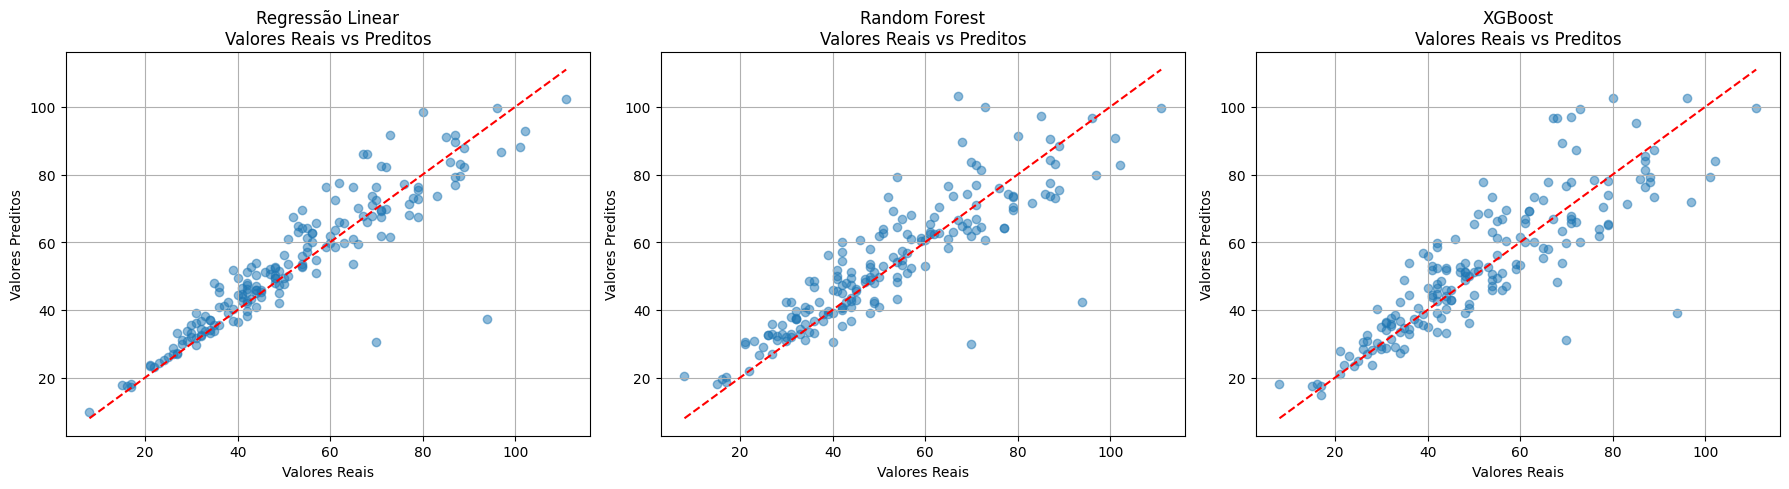

In [31]:
#Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

#Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

#Avaliação cada um dos Modelos
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return mse, rmse, r2

#Métricas: MSE, RMSE, R²
evaluate_model(y_test, y_pred_lr, "Regressão Linear")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

#Plotar Gráficos: Predito vs Real
plt.figure(figsize=(18, 5))

models_preds = [("Regressão Linear", y_pred_lr),
                ("Random Forest", y_pred_rf),
                ("XGBoost", y_pred_xgb)]

for i, (name, y_pred) in enumerate(models_preds, 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f"{name}\nValores Reais vs Preditos")
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Preditos")
    plt.grid(True)

plt.tight_layout()
plt.show()

📊 Conclusões sobre os Modelos:

1- Regressão Linear:

MSE: 68.50
RMSE: 8.28
R²: 0.8324

A Regressão Linear apresenta os melhores resultados entre os três modelos, com um R² de 0.8324, indicando que ele é capaz de explicar 83.24% da variabilidade nos tempos de entrega. O MSE e RMSE também são relativamente baixos, o que significa que o modelo tem um bom desempenho geral, especialmente considerando que é um modelo simples.

2- Random Forest:
MSE: 98.35
RMSE: 9.92
R²: 0.7594

O Random Forest, embora um modelo mais complexo e potente, obteve um desempenho ligeiramente inferior em comparação com a regressão linear. O R² de 0.7594 sugere que o modelo ainda tem uma boa capacidade preditiva, mas não conseguiu superar a regressão linear. No entanto, seu desempenho ainda é bastante sólido.

3- XGBoost:

MSE: 118.75
RMSE: 10.90
R²: 0.7095

O XGBoost teve o pior desempenho entre os três modelos, com o R² de 0.7095. Isso indica que o modelo consegue explicar apenas cerca de 70.95% da variabilidade, o que é mais baixo do que os outros dois modelos. Além disso, seus valores de MSE e RMSE são mais altos, indicando maior erro em suas previsões.